El agrupamiento de cambio medio tiene como objetivo descubrir "manchas" en una densidad uniforme de muestras. Es un algoritmo basado en el centroide, que funciona mediante la actualización de candidatos para que los centroides sean la media de los puntos dentro de una región determinada. Estos candidatos luego se filtran en una etapa de posprocesamiento para eliminar casi duplicados para formar el conjunto final de centroides.

In [1]:
import pandas as pd
from sklearn.cluster import MeanShift

In [2]:
import pathlib
pathlib.Path()


PosixPath('.')

In [3]:
CURRENT_DIR = pathlib.Path().resolve()  # Path local completo
CURRENT_DIR

PosixPath('/home/santi/personalProjects/ML_con_sklearn/ejemplos/examples/notebook')

In [4]:
df = pd.read_csv(CURRENT_DIR.parent.joinpath("data", "candy.csv"))
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [10]:
X = df.drop("competitorname", axis=1)
meanshift = MeanShift().fit(X)

In [12]:
print("El numero de clusters para nuestros datos es: ", max(meanshift.labels_) + 1 ) 
print("La ubicación de los centros de los clusters son: ", meanshift.cluster_centers_) 


El numero de clusters para nuestros datos es:  3
La ubicación de los centros de los clusters son:  [[2.25000000e-01 5.75000000e-01 1.00000000e-01 2.50000000e-02
  5.00000000e-02 2.50000000e-02 3.00000000e-01 1.00000000e-01
  5.50000000e-01 4.57599993e-01 3.67824996e-01 4.10442122e+01]
 [4.68750000e-01 5.00000000e-01 1.25000000e-01 1.56250000e-01
  9.37500000e-02 6.25000000e-02 1.25000000e-01 3.12500000e-01
  5.31250000e-01 4.57281243e-01 4.67874998e-01 5.21138597e+01]
 [8.26086957e-01 1.73913043e-01 3.04347826e-01 3.04347826e-01
  1.73913043e-01 1.73913043e-01 0.00000000e+00 5.21739130e-01
  4.34782609e-01 5.81391293e-01 6.38086963e-01 6.47120799e+01]]


In [13]:
#agregamos la columna con el valor del cluster para cada dato
df["meanshift"] = meanshift.labels_
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,meanshift
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


Utilize PCA para tener mi dataset en 2 dimensiones para que me sea facil graficarlo,
y con meanshift.cluster_centers_ me devuelven las coordenadas de un centroide, al final bota el grafico de los puntos y como se dividen
NOTA: como baje mi dataset a 2 dimensiones supongo que perdi mucha informacion, por eso esto es mas algo ludico para entender mejor lo que hacemos


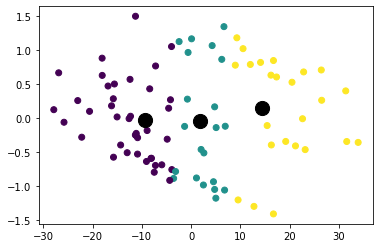

In [16]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
pca_data = pca.transform(X)
    
meanshift = MeanShift().fit(pca_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=meanshift.predict(pca_data))
plt.scatter(meanshift.cluster_centers_[:, 0], meanshift.cluster_centers_[:, 1], c='black', s=200)
plt.show()